<a href="https://colab.research.google.com/github/RutuKaravadra/handson-ml2/blob/master/Comp4630_Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name(s): Rutu Karavadra, Timothy Meneses, Emily Allerdings

# INSTRUCTIONS



**Model Training** - The purpose of this assignment is to apply your knowledge of machine learning to **two** different datasets. For each dataset, you will train **at least two** algorithms to achieve a reasonable performance. You may use trial and error process or search strategies (Grid, Randomized) to fine-tune your algorithms. If you are making any choice or trade-off, briefly document it in your code. Documentations should be added as a text cell to your notebook.

**Presentation** - From the all algorithms you use as a blackbox for your assignment, pick **one** algorithm, and study it in detail. The goal here is to understand how this algorithm works behind the scene. Based on your undrestanding of the algorithm, prepare a set of presentation slides for a 15 min presentation. The time of presentations will be after your submission date.

**Reflection** - Finally, add your contribution statement and self assessment to your notebook. 


## Algorithm to Present
To keep the topic of the presentations (the algorithm of your choice) distinct from others, you can enter the algorithm of your choice in [this shared file](https://docs.google.com/spreadsheets/d/1UXCIFQdzxBL7VbhmJEQH8tNv_MewQ_sTQlRWh6ZWUWY/edit?usp=sharing) so others know which algorithms are already chosen for presentation. There is a list of suggested algorithms that you can choose from. Most of the suggested algorithms have a classifier and also a regressor variation, e.g., we have a Decision Tree Classifier and a Decision Tree Regressor. Your presentation can be based on the classifier or regressor algorithm.

## Teamwork
Students should complete the assignment in groups of 3 people. One submission per group is sufficient.


## Submission
A copy of your notebook and also your presentation files should be submitted through your course website. All of your code and documentation should be included in the Colab notebook; additional documentation is not required. Make sure to incude all necessary library installations and imports in your notebook. The submitted assignments will be reviewed on Google Colab. You may upload your code to Google Drive and test it on Colab before your submission.

If you use an external resource such as a published paper or a tutorial website as a guide, **cite the resource** by including a link in your Markdown cell.

# EMNIST DATASET

The Extended MNIST dataset (EMNIST), like the Fashion MNIST and MNIST datasets that you have been working with, is a set of 28x28 pixel images. EMNIST extends on the characters 0-9 by adding in handwritten uppercase and lowercase letters. In particular, you will be working with the Balanced EMNIST dataset, which has a balanced class distribution. 

A total of 47 classes are used to represent the digits 0-9, uppercase letters A-Z, and lowercase letters a-z. Due to ambiguity in handwriting, some of the letter classes (C, I, J, K, L, M, O, P, S, U, V, W, X, Y and Z) are merged so that there is just one class for both upper and lower case.


You can read more about the EMNIST dataset [here](https://arxiv.org/pdf/1702.05373v1.pdf).

### **Models Chosen**

This program will be trained under two models: the Sequential Model and the Support Vector Machine Model.

The Sequential model is a linear stack of layyers and is appropriate for when each layer has one input tensor and one output tensor. 

Reference: https://stackoverflow.com/questions/57751417/what-is-meant-by-sequential-model-in-keras

The Support Vector Machine model is ML deep learning algorithm that maps the data to a dimensional space so that they can be classified into categories despite not being linearly seperable. The points essentially help build the SVM and their position specifically if they are closer or farther to the hyperplane. 

Reference: https://www.ibm.com/docs/en/spss-modeler/saas?topic=models-how-svm-works

Please also note that the data has been fully provided by: 

*Cohen, G., Afshar, S., Tapson, J., & van Schaik, A. (2017). EMNIST: an extension of MNIST to handwritten letters. Retrieved from http://arxiv.org/abs/1702.05373*

### Install and import dependencies

In [39]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
import os

from sklearn import metrics
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix

from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout


### Download dataset

In [40]:
!pip install -U extra_keras_datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Get Data and Pre-process

In [41]:
from extra_keras_datasets import emnist

This data: X_train, y_train, X_test, y_test will be used for the sequential model.

Please note the division between the train and test data has already been done therefore we will trust the proportions that they have gone with.

In [42]:
(X_train, y_train), (X_test, y_test) = emnist.load_data(type='balanced')

This data: X_train_SVM, y_train_SVM, X_test_SVM and y_test_SVM will be used for the SVM model.

In [ ]:
#(X_train_SVM, y_train_SVM), (X_test_SVM, y_test_SVM) = emnist.load_data(type='balanced')

X_train_SVM = X_train
y_train_SVM = y_train
X_test_SVM = X_test
y_test_SVM = y_test

## Visualize/Understand Data

Please note that providers of this data have explicitly stated that the data is balanced. Therefore there is limited need to worry about oversampling, undersampling, class weights and such.

In [ ]:
print('X_train: ' + str(X_train_SVM.shape))
print('Y_train: ' + str(y_train_SVM.shape))
print('X_test:  '  + str(X_test_SVM.shape))
print('Y_test:  '  + str(y_test_SVM.shape))

X_train: (112800, 28, 28)
Y_train: (112800,)
X_test:  (18800, 28, 28)
Y_test:  (18800,)


Based on the above display, y_train and y_test are 1-dimensional as they have only the labels.
X_train and X_test are 3-dimensional as they a width and height (28x28 pixels) alongside the number of images (112800 and 18800 respectively.

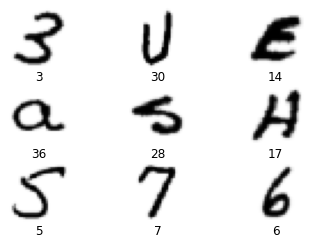

In [ ]:
for i in range(9):
    ax = plt.subplot(3, 3, i+1)
    ax.axis('off')
    rand_id = np.random.randint(0, X_train.shape[0])
    plt.imshow(X_train[rand_id], cmap='Greys')
    plt.title(y_train[rand_id], y=-0.25)

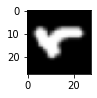

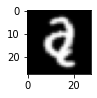

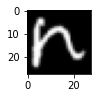

In [ ]:
# Reference: https://www.digitalocean.com/community/tutorials/mnist-dataset-in-python

from matplotlib import pyplot

for i in range(3):  
    pyplot.subplot(330 + 1 + i)
    pyplot.imshow(X_train[i], cmap=pyplot.get_cmap('gray'))
    pyplot.show()

## SVM Begins

Normalize Data (between [0,1])

In [ ]:
X_train_SVM = X_train_SVM / 255.0
X_test_SVM = X_test_SVM  / 255.0

In order to use scikit-learn's fit functionality, we need to reshape X_train_SVM and X_test_SVM datasets to 2D instead of the 3D shape it is given in (num_samples,28,28).

Therefore instead of having a 2D array for the width and height of each image, it will be changed to one long array of (28x28 = 784 pixels).

In [ ]:
X_train_SVM = X_train_SVM.reshape(112800, 784)
X_test_SVM = X_test_SVM.reshape(18800, 784)

Thanks to testing, a big realization was that this dataset is massive which means it is taking a LONG time to go through everything to process.

Therefore, based on testing different number of elements to sample, we have decided that 10000 samples is adequate to get a decent accuracy and be done in a reasonable amount of time.

In [ ]:
X_train_SVM = X_train_SVM[:10000, :]
y_train_SVM = y_train_SVM[:10000]
X_test_SVM = X_test_SVM[:10000, :]
y_test_SVM = y_test_SVM[:10000]

In [ ]:
#check to ensure the number of samples has been adequately changed. Sometimes, due to jupyter notesbook's lagging, it does not change.

X_train_SVM.shape

(10000, 784)

# Create the support vector classification model and begin training

The training takes approximately 21 seconds.

In [ ]:
#from sklearn import svm

model = svm.SVC()
model.fit(X_train_SVM, y_train_SVM)

SVC()

#Test

In [ ]:
y_pred_SVM = model.predict(X_test_SVM)

In [ ]:
#from sklearn import metrics

acc = metrics.accuracy_score(y_test_SVM, y_pred_SVM)
print('\n The Accuracy reported using the SVM model is: ', acc)


 The Accuracy reported using the SVM model is:  0.7582


In [ ]:
#from sklearn.metrics import classification_report, confusion_matrix
#from sklearn import metrics

print(confusion_matrix(y_pred_SVM,y_test_SVM))
print(classification_report(y_pred_SVM, y_test_SVM))

[[147   0   0 ...   0   0   0]
 [  0 146   0 ...   0   0   6]
 [  0   0 149 ...   0   0   0]
 ...
 [  0   0   1 ...  66   0   0]
 [  0   0   0 ...   1 191   7]
 [  0   0   0 ...   3   2 132]]
              precision    recall  f1-score   support

           0       0.67      0.58      0.62       254
           1       0.66      0.47      0.55       311
           2       0.71      0.80      0.75       186
           3       0.92      0.89      0.90       221
           4       0.79      0.71      0.75       220
           5       0.66      0.82      0.74       165
           6       0.83      0.85      0.84       219
           7       0.90      0.90      0.90       220
           8       0.75      0.74      0.74       220
           9       0.85      0.56      0.68       318
          10       0.81      0.83      0.82       200
          11       0.83      0.79      0.81       227
          12       0.87      0.84      0.85       228
          13       0.79      0.81      0.80       2

#Sequential Model

Please note the data has been inputted and explored in the beginning.

Normalizing data (between [0,1])

In [43]:
X_train = X_train.astype(np.float32)/255
X_test = X_test.astype(np.float32)/255

Expand to image dimensions to 3 dimenions of 28x28x1. The algorithm that will be used takes in 3 dimensions not 2.

In the SVM model, np.reshape was used however here np.expand_dims is being utilized. Both are equivalent.

In [44]:
X_train = np.expand_dims(X_train,-1)
X_test = np.expand_dims(X_test,-1)

Check to see if it has been changed to 4D

In [45]:
X_train.shape

(112800, 28, 28, 1)

Convert the classes to one hot vector. So whenever there is a value, that location will have a one and the rest will be zero. It is a way of ensuring that the Machine Learning algorithm does not think that the higher the number, the greater its importance.

In [46]:
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

## Create the Sequential Model

In [47]:
model = Sequential()

Convolution

Reference: https://medium.com/@cdabakoglu/what-is-convolutional-neural-network-cnn-with-keras-cab447ad204c

Reference: https://stackoverflow.com/questions/36946671/keras-model-summary-result-understanding-the-of-parameters

In [48]:
# add different layers
#add the input layer starting with Conv2D 
#32 number of units, kernel size is 3x3, input shape of the image, activation being used is relu 

model.add(Conv2D(32, (3,3), input_shape = (28, 28, 1), activation= 'relu'))
model.add(MaxPool2D((2,2)))

#add another convlution layers - increase size to 64 units
model.add(Conv2D(64, (3,3), input_shape = (28, 28, 1), activation= 'relu'))
model.add(MaxPool2D((2,2)))

model.add(Flatten())



Prevent Overfitting (25% drop)

In [49]:
model.add(Dropout(0.25))

Number of classes is 47 and the activation is softmax.

In [50]:
model.add(Dense(47, activation= "softmax"))

In [51]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 dropout_1 (Dropout)         (None, 1600)             

Reference: https://www.tensorflow.org/api_docs/python/tf/keras/Model#compile

In [52]:
model.compile(optimizer= 'adam', loss= keras.losses.categorical_crossentropy, metrics = ['accuracy'])

In [53]:
# Callbacks

from keras.callbacks import EarlyStopping, ModelCheckpoint

# Earlystopping - monitors validation accuracy, 4 trials

es = EarlyStopping(monitor= 'val_acc', min_delta= 0.01, patience= 4, verbose= 1)

#Model Checkpoint - file path

mc = ModelCheckpoint("./bestmodel.h5", monitor= "val_acc", verbose= 1, save_best_only = True)

cb = [es,mc]

## Model Training

In [54]:
his = model.fit(X_train, y_train, epochs= 2, validation_split= 0.3)

Epoch 1/2
2468/2468 [==============================] - 104s 42ms/step - loss: 0.8248 - accuracy: 0.7499 - val_loss: 0.5108 - val_accuracy: 0.8347
Epoch 2/2
2468/2468 [==============================] - 88s 35ms/step - loss: 0.5016 - accuracy: 0.8362 - val_loss: 0.4430 - val_accuracy: 0.8500


In [76]:
y_pred_Seq= model.predict(X_test)

print(y_pred_Seq)

y_pred_Seq = np.argmax(y_pred_Seq, axis=1)
y_test = np.argmax(y_test, axis=1)
print(y_pred_Seq)


588/588 [==============================] - 6s 10ms/step
[[4.11559624e-04 1.33092626e-05 2.97440147e-05 ... 1.90055859e-03
  1.43528238e-08 9.11033931e-06]
 [8.69468204e-06 2.41674097e-10 3.11980398e-06 ... 7.05334969e-05
  2.06293969e-08 9.71259215e-05]
 [3.69828541e-07 7.15793874e-07 9.74917839e-07 ... 1.22341596e-01
  3.18566435e-08 3.53047710e-07]
 ...
 [1.53323799e-05 5.10722756e-01 1.57313509e-04 ... 1.18842151e-03
  5.00668946e-04 7.82222953e-03]
 [1.15222656e-05 2.34398248e-13 4.50707012e-06 ... 5.32098929e-04
  1.39468603e-09 4.75828101e-12]
 [9.83318500e-07 2.09007994e-03 2.20963062e-04 ... 2.25319015e-03
  6.59081154e-03 1.33434997e-03]]
[41 39  9 ...  1 26 33]


In [77]:
print(confusion_matrix(y_pred_Seq,y_test))
print(classification_report(y_pred_Seq, y_test))

[[347   0   0 ...   2   0   0]
 [  0 237   0 ...   0   0   0]
 [  0   0 316 ...   1   0   0]
 ...
 [  0   0   2 ... 205   0   0]
 [  0   0   0 ...   0 370   5]
 [  0   0   0 ...   2   1 349]]
              precision    recall  f1-score   support

           0       0.87      0.55      0.67       629
           1       0.59      0.56      0.58       422
           2       0.79      0.92      0.85       345
           3       0.95      0.98      0.96       388
           4       0.87      0.90      0.89       388
           5       0.85      0.92      0.89       369
           6       0.94      0.91      0.92       409
           7       0.98      0.92      0.95       426
           8       0.89      0.90      0.89       394
           9       0.86      0.63      0.73       545
          10       0.93      0.92      0.92       407
          11       0.92      0.92      0.92       400
          12       0.95      0.93      0.94       411
          13       0.85      0.90      0.87       3

The [Wine Quality](https://archive.ics.uci.edu/ml/datasets/wine+quality) dataset consists of a set of 11 input parameters (acidity, sugar content, alcohol level, etc) and a single output ("quality" as assessed by expert tasters). The white wine dataset, with a total of 4898 samples, is selected for this problem.

While the wine quality dataset is smaller with fewer inputs than the MNIST datasets, there are a number of challenges to overcome:
- Not all inputs are necessarily relevant, and some may be correlated. Part of your experimentation should be determining which inputs to use.
- The dataset is not pre-split into test/train/validation sets.
- The input parameters are not on the same scale, so they require preprocessing.
- The output classes are unbalanced. You will have to address this through appropriate choice of loss metric or resampling.
- The output can be treated as either a regression problem (predict a continuous value from 0 to 9) or as a classification problem. 

### Import Dependencies and Librares

---



In [ ]:
import sys
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns

### Load Dataset and Understanding Data Structure

In [ ]:
whiteWineCsv = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv'
wineData = pd.read_csv(whiteWineCsv, sep=';')
wineData.head()

In [ ]:
wineData.info()

###Data Analysis

Descriptive statistics and summary of each column

In [ ]:
wineData.describe()

Count the null values on each column to see if there are rows that needs to be replaced or removed

In [ ]:
wineData.isna().sum()

Compute the pairwise correlation between the columns to get a better understanding which columns are relevant

In [ ]:
corr = wineData.corr()
sns.heatmap(corr)

Count the occurance of each value in the quality column

In [ ]:
wineData.quality.value_counts()

The previous line of code gave us an insight that the column for quality is in the range of 3-9. With 6 as the most reoccuring value and 9 with the least. Now we can check the mean of each column for each value on the column.

In [ ]:
wineData.groupby('quality').mean()

### Data Visualization


In [ ]:
import matplotlib.pyplot as plt

sns.countplot(x='quality', data=wineData)

### Histograms/BoxPlots/DensityPlot.
We plot each features in different ways to get a better understanding of the data we are working with. Histograms allows us to see the probabilistic distribution of each features. The box plots on the other hand helps us identify the skewness, data symmetry and outliers in our data set.


In [ ]:
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

wineData.hist(bins=50, figsize=(15, 15))
plt.show()

In [ ]:
wineData.plot(kind = 'box', subplots=True, layout=(4,3), sharex=False, figsize=(15,15))

In [ ]:
wineData.plot(kind='density', subplots=True, layout=(4,3), sharex=False, figsize=(15,15))

###Correlation between each features

Previously we saw the correlation between each features through the heat map. We want to see it visually by plotting them in pair plots.

In [ ]:
sns.pairplot(wineData)

###Violin Plot
From our heat map and pair plot, the features that have the highest correlation to quality are: alcohol, ph, sulphur dioxide, citric acids, and sulphates. The violin plot helps us visualize the distribution of these values against each quality level.

In [ ]:
sns.violinplot(x='quality', y='alcohol', data=wineData)

In [ ]:
sns.violinplot(x='quality', y='pH', data=wineData)

In [ ]:
sns.violinplot(x='quality', y='citric acid', data=wineData)

###Feature Engineering

Rather than having the quality of the wine to be a range of 3-9, We've chosen to bin the data and label the feature as:
  bad: 3-4
  medium: 5-7
  good: 8-9

In [ ]:
wineData['wine quality'] = ['Bad' if x<=5 else 'Medium' if (x<=7 and x>5) else 'Good' for x in wineData['quality']]
wineData.head()
wineData['wine quality'].value_counts()

###Hyperparameter tuning (OPTIONAL)

 Finding which parameters are the best for the model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

y = wineData['wine quality']
                 
X = wineData.drop(columns=['wine quality', 'quality','density','chlorides'])

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

print(rf_random.best_params_)

In [ ]:
y_pred=rf_random.best_estimator_.predict(X_test)

from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

### Splitting Data and normalizing the train and test data

In [ ]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

y = wineData['wine quality']
                 
X = wineData.drop(columns=['wine quality', 'quality','density','chlorides'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


#Normalize train and test data after splitting before giving the data to the classifier for training
normalizer = preprocessing.Normalizer()
normalized_X_train = normalizer.fit_transform(X_train)
normalized_X_test = normalizer.transform(X_test)

## Training and Testing

In [ ]:
#Create a Random Forest Classifier
clf=RandomForestClassifier(n_estimators=1000, min_samples_split=2)

clf.fit(X_train, y_train)

y_pred=clf.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# REFLECTION

**Contribution statement**: Briefly explain the contribution of each member to the assignment.



**Rutu:** Focused on coding, documenting and visualizing the EMNIST Dataset using the SVM model and the Sequential model. The bulk of the challenge for this dataset was to handle such data and ensure the training happened in a reasonal amount of time. For instance, the SVM model would have higher accuracy if I changed the sample size to >10000 however the time it would take to train the model would be unreasonable. Apart from the actual code, I also documented the SVM and Sequential Model algorithms.

Note: I tried the EMNIST Dataset for both logistic regression and random forest before SVM, however logistic regression took overtly more time despite intense data cleaning and I was not able to get random forest running unfortunately.

**Timothy:** mostly focused on data visualization, and understanding the data sets and coming up with a solution to process the data better. For example, the wine quality data set had number of features that were irrelevant to the problem; some of the features had to be disregarded. The output was also considered as a classification problem instead of a regression problem.

**Emily:**

**Self assessment**: In your opinion, what are the deficiencies in your work that need to be improved?



*   For the wine quality data set, one way we could improve is to do cross validation, that is choosing different parts of the data set as the test/train data. This will allow us to run our algorithm on different chunks of the original data set. 
*   One possible way of improving the results is trying out a lot more algorithms and see which ones will yield the greatest results. As discussed in class this could be done by using a cloud platform, using multiple Virtual Machines and running different algorithms in each. However as were limited in time and resources, doing so will be a challenge, but nonetheless its one way to improve the work.
*   In Hyperparameter tuning, we used random search to find the best set of parameters available, howerver we used Random search rather than Grid search. If we want to find the best parameters available for the algorithm its better to use Grid search, however, it will take more time




# MARKING RUBRIC



The following table provides a summary of how your assignment will be marked. Your results will not be ranked against each other; what counts is reasonable choices and description of your thought processes.

<table>
<tr>
<th>Item</th>
<th>Points</th>
</tr>

<tr>
<td>The training process for dataset 1</td>
<td>20</td>
</tr>

<tr>
<td>The training process for dataset 2</td>
<td>20</td>
</tr>

<tr>
<td>Documentation of the process and choices made </td>
<td>20</td>
</tr>

<tr>
<td>Overall code quality</td>
<td>5</td>
</tr>

<tr>
<td>Presentation</td>
<td>30</td>
</tr>

<tr>
<td>Reflection</td>
<td>5</td>
</tr>


<tr>
<td><b>Total:</b></td>
<td><b>100</b></td>
</tr>

</table>